5.	Section (1.1.3) Modify Program 1.3 to plot the error scaling in the Euler method for dy/dt = sin(y) with the following parameters:
a.	Initial condition:  y[0] = 1;
b.	Time interval: [0,2π]
Use the same time steps as in the Program 1.3. Label your curves as in Figure 1.5 using text 


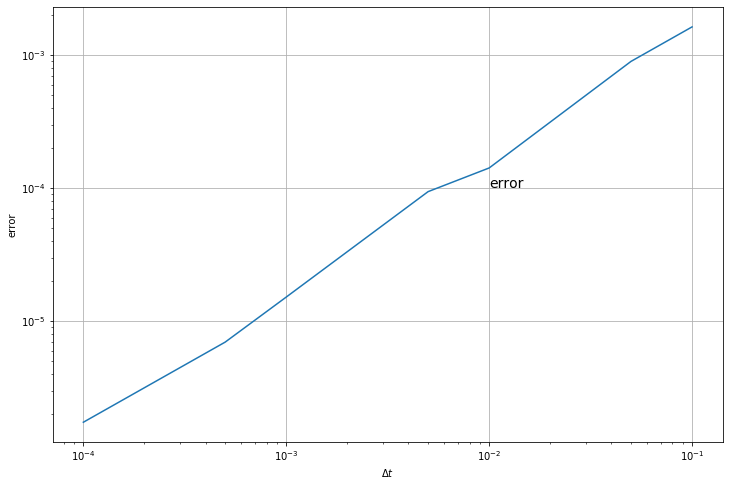

In [1]:
##5

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Find exact solution (Use an approximation as indicated by professor)

dt = 0.000001

#dy/dt = sin(y)

#Initial value
y = 1.0

#start time
time = 0.0

#end time
t_final = 2*np.pi

Nsteps = int(np.round(t_final/dt))

for j in range(Nsteps):
    y = y + dt*np.sin(y)
    time = time + dt
    


#EVALUATE ERROR, AS A DIFFERENCE BETWEEN "EXACT VALUE" ABOVE AND APPROXIMATED VALUES BELOW:

#Evaluating the approximate values of y at different time steps
dt = np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])


#Initialize 2-dimensional array to store errors and their respective time steps

x = np.zeros((len(dt),2))

for j in range(len(dt)):
    
    #Initial value
    y_est = 1
    
    #starting time value
    time = 0
    
    #ending time time value
    t_final = 2*np.pi
    
    #Find the total number of steps for each step size in dt
    Nsteps = int(np.round((t_final / dt[j])))
    
    #Iterate through dt (using Euler's method) to get the estimated y values and t values
    for t in range(Nsteps):
        y_est = y_est + dt[j]*np.sin(y_est)
        time = time + dt[j]
        
###
    x[j,0] = dt[j] ## store time steps
    x[j,1] = np.abs(y - y_est) ##store error


#Plotting the graphs
fig = plt.figure(figsize = (12,8))

ax = fig.add_subplot(1,1,1)

ax.loglog(x[:,0], x[:,1])
ax.set_title('')
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('error')
ax.grid()
ax.text(0.01, 0.0001, 'error', fontsize = '14')

plt.show()
        

# print(x)

6.  Write a script (not a function) that does the following:
i. Initialize:  n_soln = 8; dt0 = 0.25; x0=1; v0 = 0; t_final = 3;
	x_f, v_f, and	dt_vec should all be zero vectors of length n
     
ii. Loop from  jj = 0 to n_soln-1
Compute the solutions of the mass-spring system using the Euler method with the initial conditions [x0 , v0] on the interval 0 < t < t_final with time step dt0/(2**jj).
In Figure 1, plot the position of each solution as a function of time. Plot each curve in a different color. There are several ways to do this. If someone finds a good way and is willing to share with the group, please send an email.
The title of this plot should be,  “Position as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
In Figure 2, plot the velocity of each solution as a function of time.  The title of this plot should be,  “Velocity as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
In Figure 3, plot the position of each solution on the x axis versus the velocity on the y-axis. Make again,  each curve has a different color. The title of this plot should be,  “Phase plot for solution of mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
Store the final values of x(t_final) and v(t_final) in the vectors x_f and v_f, respectively.  (Note that the final values correspond to Y[-1,1] and Y[-1,2] respectively.)
Store the current time step in the vector dt_vec.
end loop
iii. Output:
In Figure 4, plot log2(dt_vec[:-1]) versus log2(abs(diff(x_f)))  (note that ‘diff’ is a numpy function that gives the vector of differences).  Title: “Position error scaling with step size for Euler method”. Put appropriate labels on the x and y axis.
In Figure 5, plot log2(dt_vec[:-1]) versus log2(abs(diff(v_f))).  Title: “Velocity error scaling with step size for Euler method”. Put appropriate labels on the x and y axis.


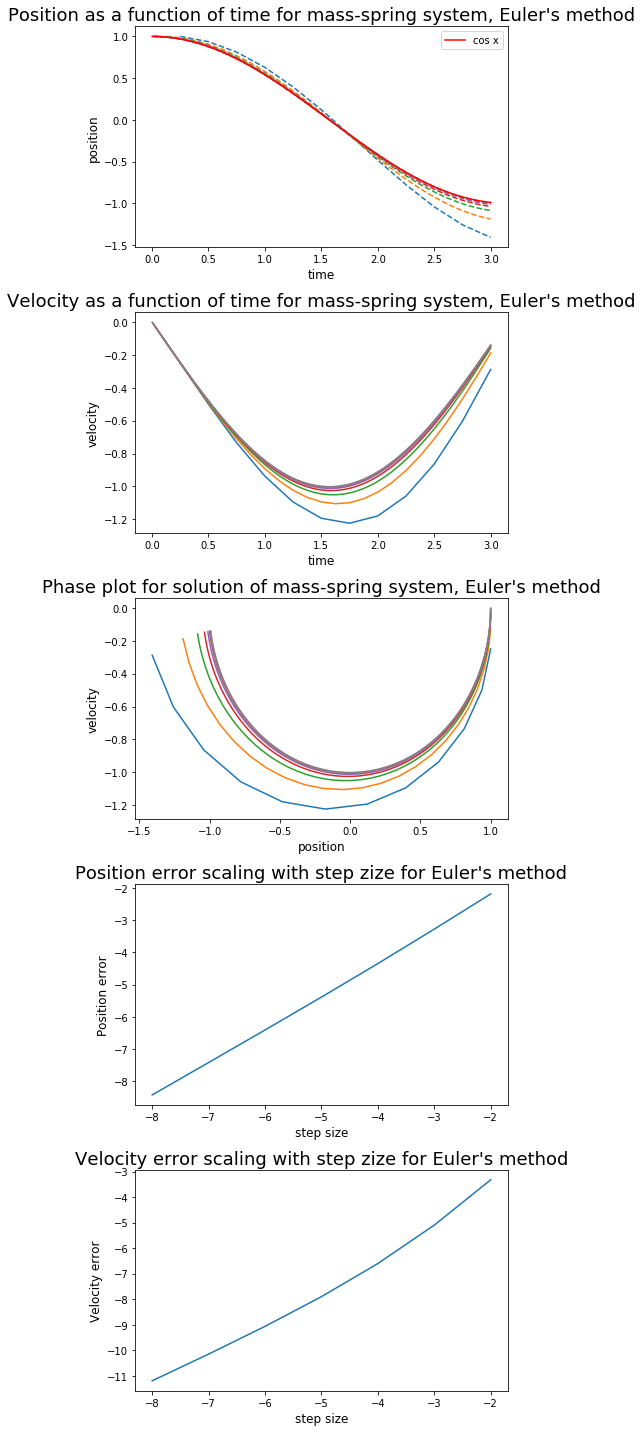

In [2]:
#### #6

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Initializing variables

#dx/dt = v
#dv/dt = -(k/m)*x = - x
# y = x/v


n_soln = 8

dt_0 = 0.25

x = 1
v = 0

x_f = np.zeros(n_soln)
v_f = np.zeros(n_soln)
dt_vec = np.zeros(n_soln)
x_f[0] = x
v_f[0] = v
dt_vec[0] = dt_0
y = np.zeros((n_soln,2))

t_final = 3


#Create an instance of plot.figure
fig = plt.figure(figsize = (8,20))
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)
    

###################

#for-loop that iterates n_Soln, 
for jj in range(n_soln):

#reset for each solution

#no. of steps to take
    Nsteps = int(np.round(t_final/(dt_0/2**jj))) # delta t is dt_0/2**jj
    time = 0
    x = 1
    v = 0

# keep track of coordinates & resetting for each solution
    position = np.zeros(Nsteps) 
    velocity = np.zeros(Nsteps)
    times = np.zeros(Nsteps)

    for i in range(Nsteps):

        dv = -x   # ... dv/dt = - x
        dx = v    # ... dx/dt = v
        dt = dt_0/2**jj
        
        x = x + dt * dx # I want my new positions of x , using Euler Method # euler's method: xn+1 = xn + vn*dt
        v = v + dt * dv # I want my new position of v, using Euler Method # euler's method = vn+1 = vn -(k/m)*x* dt...k/m =1
        time = time + dt # Keep track of your time




        position[i] = x # save the current position in the array
        velocity[i] = v # save the current velocity in the array
        times[i] = time  # save the current time in the array
        
    x_f[jj] = x
    v_f[jj] = v
    dt_vec[jj] = (dt_0/2**jj)   #save time steps
    
    ax1.plot(times, position, "--")
    ax1.set_title("Position as a function of time for mass-spring system, Euler's method", fontsize = '18')
    ax1.set_xlabel('time', fontsize = '12')
    ax1.set_ylabel('position', fontsize = '12')  
    
    ax2.plot(times, velocity)
    ax2.set_title("Velocity as a function of time for mass-spring system, Euler's method", fontsize = '18')
    ax2.set_xlabel('time', fontsize = '12')
    ax2.set_ylabel('velocity', fontsize = '12')

    ax3.plot(position, velocity)
    ax3.set_title("Phase plot for solution of mass-spring system, Euler's method", fontsize = '18')
    ax3.set_xlabel('position', fontsize = '12')
    ax3.set_ylabel('velocity', fontsize = '12')
    
    
ax4.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(x_f))))
ax4.set_title("Position error scaling with step zize for Euler's method", fontsize = '18')
ax4.set_xlabel('step size', fontsize = '12')
ax4.set_ylabel('Position error', fontsize = '12')

ax5.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(v_f))))
ax5.set_title("Velocity error scaling with step zize for Euler's method", fontsize = '18')
ax5.set_xlabel('step size', fontsize = '12')
ax5.set_ylabel('Velocity error', fontsize = '12')

ax1.plot(times, np.cos(times), 'r', label = 'cos x')
ax1.legend()


plt.tight_layout()
    
    
##############################################








